# Linear regession with LOOCV

LOOCV: https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

## Reading in data

In [38]:
import pandas as pd
import numpy as np
import geopandas as gpd
pd.set_option('display.max_columns', None)

In [39]:
df = pd.read_csv('/Users/bovandenbosch/Documents/Master_Applied Data_Science/Thesis/Data/df')
df = df.iloc[: , 1:]

In [40]:
#df = pd.read_csv('/Users/bovandenbosch/Documents/Master_Applied Data_Science/Thesis/Data/df_no_missing')
#df = df.iloc[: , 1:]

In [41]:
#to reduce multicolinearty issues. We drop following. this corellated >0.7 all regions
df = df.drop(['Zmin','Zmax','dvoldt','Lmax','tstar_ela_h','debris_vol_ela_p','temp_mean_1980-2000','prcp_mean_1980_2000','Area','velocity_mean','ice_thickness'],axis=1)

## regression all glaciers HMA

In [42]:
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt

In [43]:
dfa = df.drop(['O2Region','rgi_id'],axis=1)

In [44]:
y = dfa['dmdtda']
X = dfa.drop(['dmdtda'], axis=1)

In [45]:
#making a zscore
numerical = X.drop(['glacial_lake','Aspect'], axis=1)
x_list_numerical = numerical.columns

X_z = (X[x_list_numerical] - X[x_list_numerical].mean())/X[x_list_numerical].std()
X_z = pd.concat([X_z, X['glacial_lake']], axis=1)
X_z = pd.concat([X_z, X['Aspect']], axis=1)

In [46]:
#Model statistics
#Must add constant for y-intercept
model = sm.OLS(y, sm.add_constant(X_z)).fit()

sig = np.where(model.pvalues <0.05)
modelAll = model.params.iloc[sig]

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 dmdtda   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     259.8
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:40:57   Log-Likelihood:                -311.04
No. Observations:                8097   AIC:                             652.1
Df Residuals:                    8082   BIC:                             757.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2082    

MAE: 0.18881200345157373
R squard: 0.3074636731768887


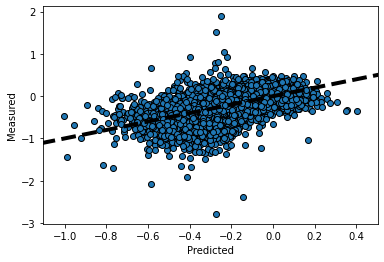

In [47]:
lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
cv = LeaveOneOut()
predicted = cross_val_predict(lr, X_z, y, cv=cv)

MAE = mean(abs(y - predicted)) # MAE
accuracy = metrics.r2_score(y, predicted) #Rsquared
print('MAE:',MAE)
print('R squard:',accuracy)



fig, ax = plt.subplots()
ax.scatter(predicted,y, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Predicted")
ax.set_ylabel("Measured")
plt.xlim([predicted.min()-0.1, predicted.max()+0.1])
plt.savefig("all_residual.png")

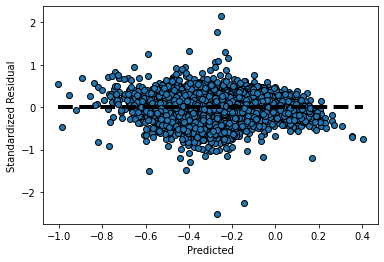

In [48]:
residual = y - predicted

fig, ax = plt.subplots()
ax.scatter(predicted,residual, edgecolors=(0, 0, 0))
ax.plot([predicted.min(), predicted.max()], [0,0], "k--", lw=4)
ax.set_xlabel("Predicted")
ax.set_ylabel("Standardized Residual")
plt.savefig("all_residual_standardized.png")

## OLS regression Per O2 region

In [49]:
rgi13 = gpd.read_file('/Users/bovandenbosch/Documents/Master_Applied Data_Science/Thesis/Data/RGI/nsidc0770_13_rgi60_CentralAsia/13_rgi60_CentralAsia.shp')
rgi14 = gpd.read_file('/Users/bovandenbosch/Documents/Master_Applied Data_Science/Thesis/Data/RGI/nsidc0770_14_rgi60_SouthAsiaWest/14_rgi60_SouthAsiaWest.shp')
rgi15 = gpd.read_file('/Users/bovandenbosch/Documents/Master_Applied Data_Science/Thesis/Data/RGI/nsidc0770_15_rgi60_SouthAsiaEast/15_rgi60_SouthAsiaEast.shp')

In [50]:
# rgi_concat = pd.concat([rgi13,rgi14,rgi15],ignore_index=True)
rgi13 = rgi13.rename(columns={"RGIId": "rgi_id"})
rgi13 = rgi13[rgi13['Area'] > 2]
rgi13 = rgi13[['rgi_id']]
rgi13 = pd.DataFrame(rgi13)

rgi14 = rgi14.rename(columns={"RGIId": "rgi_id"})
rgi14 = rgi14[rgi14['Area'] > 2]
rgi14 = rgi14[['rgi_id']]
rgi14 = pd.DataFrame(rgi14)

rgi15 = rgi15.rename(columns={"RGIId": "rgi_id"})
rgi15 = rgi15[rgi15['Area'] > 2]
rgi15 = rgi15[['rgi_id']]
rgi15 = pd.DataFrame(rgi15)

In [51]:
df13 = df.merge(rgi13,on='rgi_id',how='inner')
df14 = df.merge(rgi14,on='rgi_id',how='inner')
df15 = df.merge(rgi15,on='rgi_id',how='inner')

In [52]:
df13_1 = df13[df13['O2Region'] == 1]
df13_2 = df13[df13['O2Region'] == 2]
df13_3 = df13[df13['O2Region'] == 3]
df13_4 = df13[df13['O2Region'] == 4]
df13_5 = df13[df13['O2Region'] == 5]
df13_6 = df13[df13['O2Region'] == 6]
df13_7 = df13[df13['O2Region'] == 7]
df13_8 = df13[df13['O2Region'] == 8]
df13_9 = df13[df13['O2Region'] == 9]

df14_1 = df14[df14['O2Region'] == 1]
df14_2 = df14[df14['O2Region'] == 2]
df14_3 = df14[df14['O2Region'] == 3]

df15_1 = df15[df15['O2Region'] == 1]
df15_2 = df15[df15['O2Region'] == 2]
df15_3 = df15[df15['O2Region'] == 3]

In [53]:
df13_1 = df13[df13['O2Region'] == 1].drop(['rgi_id','O2Region'],axis=1) #remove non numerical colums
df13_2 = df13[df13['O2Region'] == 2].drop(['rgi_id','O2Region'],axis=1) #remove non numerical colums
df13_3 = df13[df13['O2Region'] == 3].drop(['rgi_id','O2Region'],axis=1) #remove non numerical colums
df13_4 = df13[df13['O2Region'] == 4].drop(['rgi_id','O2Region'],axis=1) #remove non numerical colums
df13_5 = df13[df13['O2Region'] == 5].drop(['rgi_id','O2Region'],axis=1) #remove non numerical colums
df13_6 = df13[df13['O2Region'] == 6].drop(['rgi_id','O2Region'],axis=1) #remove non numerical colums
df13_7 = df13[df13['O2Region'] == 7].drop(['rgi_id','O2Region'],axis=1) #remove non numerical colums
df13_8 = df13[df13['O2Region'] == 8].drop(['rgi_id','O2Region'],axis=1) #remove non numerical colums
df13_9 = df13[df13['O2Region'] == 9].drop(['rgi_id','O2Region'],axis=1) #remove non numerical colums

df14_1 = df14[df14['O2Region'] == 1].drop(['rgi_id','O2Region'],axis=1) #remove non numerical colums
df14_2 = df14[df14['O2Region'] == 2].drop(['rgi_id','O2Region'],axis=1) #remove non numerical colums
df14_3 = df14[df14['O2Region'] == 3].drop(['rgi_id','O2Region'],axis=1) #remove non numerical colums

df15_1 = df15[df15['O2Region'] == 1].drop(['rgi_id','O2Region'],axis=1) #remove non numerical colums
df15_2 = df15[df15['O2Region'] == 2].drop(['rgi_id','O2Region'],axis=1) #remove non numerical colums
df15_3 = df15[df15['O2Region'] == 3].drop(['rgi_id','O2Region'],axis=1) #remove non numerical colums

### region 13_1

In [54]:
df = df13_1

In [55]:
#nog extra drop per regio based on previous correlations 
df = df.drop(['temp_diff_1980-2000'],axis=1)

In [56]:
y = df['dmdtda']
X = df.drop(['dmdtda'], axis=1)

In [57]:
#making a zscore
numerical = X.drop(['glacial_lake','Aspect'], axis=1)
x_list_numerical = numerical.columns

X_z = (X[x_list_numerical] - X[x_list_numerical].mean())/X[x_list_numerical].std()
X_z = pd.concat([X_z, X['glacial_lake']], axis=1)
X_z = pd.concat([X_z, X['Aspect']], axis=1)

In [58]:
#Model statistics
#Must add constant for y-intercept
model = sm.OLS(y, sm.add_constant(X_z)).fit()

sig = np.where(model.pvalues <0.05)
model13_1 = model.params.iloc[sig]

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 dmdtda   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     7.459
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           5.92e-11
Time:                        14:43:03   Log-Likelihood:                 107.83
No. Observations:                 151   AIC:                            -187.7
Df Residuals:                     137   BIC:                            -145.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0920    

MAE: 0.10164528182049784
R squard: 0.28353611846393856


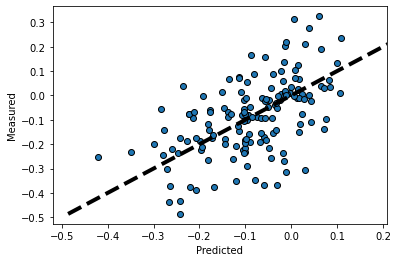

In [59]:
lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
cv = LeaveOneOut()
predicted = cross_val_predict(lr, X_z, y, cv=cv)

MAE = mean(abs(y - predicted)) # MAE
accuracy = metrics.r2_score(y, predicted) #Rsquared
print('MAE:',MAE)
print('R squard:',accuracy)




fig, ax = plt.subplots()
ax.scatter(predicted,y, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Predicted")
ax.set_ylabel("Measured")
plt.xlim([predicted.min()-0.1, predicted.max()+0.1])
plt.savefig("13_1_residual.png")

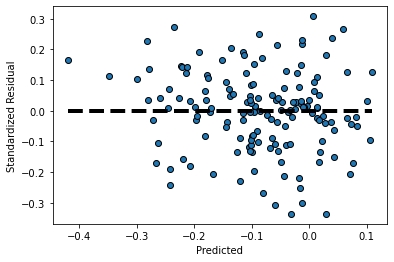

In [60]:
residual = y - predicted

fig, ax = plt.subplots()
ax.scatter(predicted,residual, edgecolors=(0, 0, 0))
ax.plot([predicted.min(), predicted.max()], [0,0], "k--", lw=4)
ax.set_xlabel("Predicted")
ax.set_ylabel("Standardized Residual")
plt.show()

#### region 13_2

In [61]:
df = df13_2

In [62]:
#nog ectra drop per regio based on previous collerations 
df = df.drop(['prcp_mean'],axis=1)

In [63]:
y = df['dmdtda']
X = df.drop(['dmdtda'], axis=1)

In [64]:
# ruimte om variable te transformeren als ik wil 
#['Slope_log'] = np.log(X['Slope'])

In [65]:
#making a zscore
numerical = X.drop(['glacial_lake','Aspect'], axis=1)
x_list_numerical = numerical.columns

X_z = (X[x_list_numerical] - X[x_list_numerical].mean())/X[x_list_numerical].std()
X_z = pd.concat([X_z, X['glacial_lake']], axis=1)
X_z = pd.concat([X_z, X['Aspect']], axis=1)

In [66]:
#Model statistics
#Must add constant for y-intercept
model = sm.OLS(y, sm.add_constant(X_z)).fit()

sig = np.where(model.pvalues <0.05)
model13_2 = model.params.iloc[sig]

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 dmdtda   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     22.64
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           1.25e-46
Time:                        14:43:03   Log-Likelihood:                 440.72
No. Observations:                 840   AIC:                            -853.4
Df Residuals:                     826   BIC:                            -787.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0920    

MAE: 0.10495811922730877
R squard: 0.2370787473555992


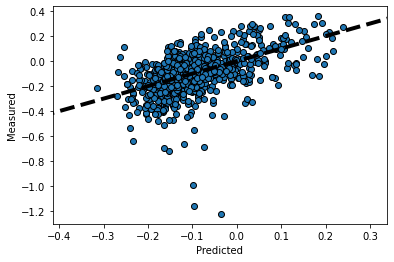

In [67]:
lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
cv = LeaveOneOut()
predicted = cross_val_predict(lr, X_z, y, cv=cv)

MAE = mean(abs(y - predicted)) # MAE
accuracy = metrics.r2_score(y, predicted) #Rsquared
print('MAE:',MAE)
print('R squard:',accuracy)




fig, ax = plt.subplots()
ax.scatter(predicted,y, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Predicted")
ax.set_ylabel("Measured")
plt.xlim([predicted.min()-0.1, predicted.max()+0.1])
plt.savefig("13_2_residual.png")

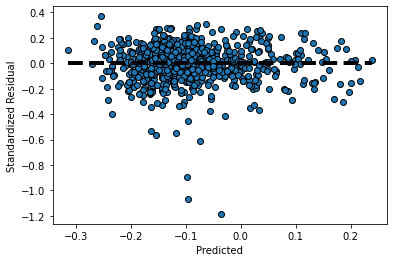

In [68]:
residual = y - predicted

fig, ax = plt.subplots()
ax.scatter(predicted,residual, edgecolors=(0, 0, 0))
ax.plot([predicted.min(), predicted.max()], [0,0], "k--", lw=4)
ax.set_xlabel("Predicted")
ax.set_ylabel("Standardized Residual")
plt.show()

#### region 13_3

In [69]:
df = df13_3

In [70]:
#nog ectra drop per regio based on previous collerations 
df = df.drop(['prcp_mean','Velocity_log'],axis=1)

In [71]:
y = df['dmdtda']
X = df.drop(['dmdtda'], axis=1)

In [72]:
# ruimte om variable te transformeren als ik wil 
#['Slope_log'] = np.log(X['Slope'])

In [73]:
#making a zscore
numerical = X.drop(['glacial_lake','Aspect'], axis=1)
x_list_numerical = numerical.columns

X_z = (X[x_list_numerical] - X[x_list_numerical].mean())/X[x_list_numerical].std()
X_z = pd.concat([X_z, X['glacial_lake']], axis=1)
X_z = pd.concat([X_z, X['Aspect']], axis=1)

In [74]:
#Model statistics
#Must add constant for y-intercept
model = sm.OLS(y, sm.add_constant(X_z)).fit()

sig = np.where(model.pvalues <0.05)
model13_3 = model.params.iloc[sig]

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 dmdtda   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     45.67
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           1.92e-80
Time:                        14:43:07   Log-Likelihood:                 247.21
No. Observations:                 738   AIC:                            -468.4
Df Residuals:                     725   BIC:                            -408.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2589    

MAE: 0.12820200558122974
R squard: 0.4076290551913586


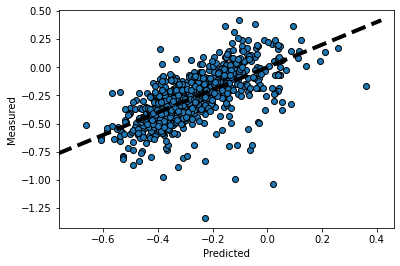

In [75]:
lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
cv = LeaveOneOut()
predicted = cross_val_predict(lr, X_z, y, cv=cv)

MAE = mean(abs(y - predicted)) # MAE
accuracy = metrics.r2_score(y, predicted) #Rsquared
print('MAE:',MAE)
print('R squard:',accuracy)




fig, ax = plt.subplots()
ax.scatter(predicted,y, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Predicted")
ax.set_ylabel("Measured")
plt.xlim([predicted.min()-0.1, predicted.max()+0.1])
plt.savefig("13_3_residual.png")

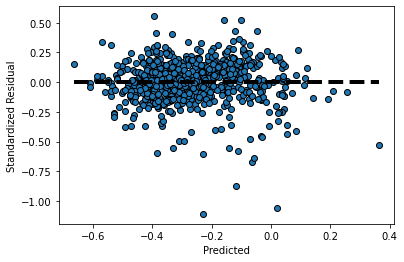

In [76]:
residual = y - predicted

fig, ax = plt.subplots()
ax.scatter(predicted,residual, edgecolors=(0, 0, 0))
ax.plot([predicted.min(), predicted.max()], [0,0], "k--", lw=4)
ax.set_xlabel("Predicted")
ax.set_ylabel("Standardized Residual")
plt.show()

#### region 13_4

In [77]:
df = df13_4

In [78]:
#nog ectra drop per regio based on previous collerations 
#df niet nodig

In [79]:
y = df['dmdtda']
X = df.drop(['dmdtda'], axis=1)

In [80]:
# ruimte om variable te transformeren als ik wil 
#['Slope_log'] = np.log(X['Slope'])

In [81]:
#making a zscore
numerical = X.drop(['glacial_lake','Aspect'], axis=1)
x_list_numerical = numerical.columns

X_z = (X[x_list_numerical] - X[x_list_numerical].mean())/X[x_list_numerical].std()
X_z = pd.concat([X_z, X['glacial_lake']], axis=1)
X_z = pd.concat([X_z, X['Aspect']], axis=1)

In [82]:
#Model statistics
#Must add constant for y-intercept
model = sm.OLS(y, sm.add_constant(X_z)).fit()

sig = np.where(model.pvalues <0.05)
model13_4 = model.params.iloc[sig]

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 dmdtda   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     18.83
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           1.30e-31
Time:                        14:43:09   Log-Likelihood:                 153.96
No. Observations:                 262   AIC:                            -277.9
Df Residuals:                     247   BIC:                            -224.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.4812    

MAE: 0.11208981158279036
R squard: 0.4457866064335677


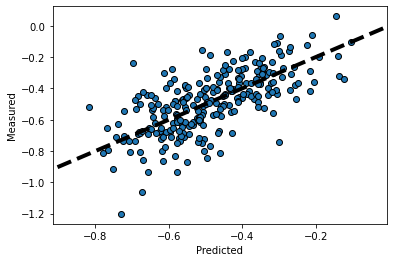

In [83]:
lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
cv = LeaveOneOut()
predicted = cross_val_predict(lr, X_z, y, cv=cv)

MAE = mean(abs(y - predicted)) # MAE
accuracy = metrics.r2_score(y, predicted) #Rsquared
print('MAE:',MAE)
print('R squard:',accuracy)



fig, ax = plt.subplots()
ax.scatter(predicted,y, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Predicted")
ax.set_ylabel("Measured")
plt.xlim([predicted.min()-0.1, predicted.max()+0.1])
plt.savefig("13_4_residual.png")

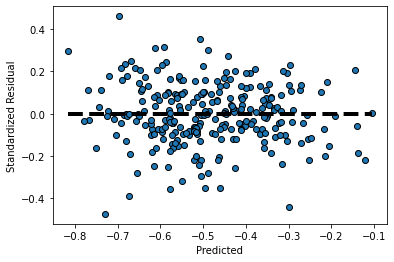

In [84]:
residual = y - predicted

fig, ax = plt.subplots()
ax.scatter(predicted,residual, edgecolors=(0, 0, 0))
ax.plot([predicted.min(), predicted.max()], [0,0], "k--", lw=4)
ax.set_xlabel("Predicted")
ax.set_ylabel("Standardized Residual")
plt.show()

#### region 13_5

In [85]:
df = df13_5

In [86]:
#nog ectra drop per regio based on previous collerations 
df = df.drop(['prcp_diff','prcp_mean'],axis=1)

In [87]:
y = df['dmdtda']
X = df.drop(['dmdtda'], axis=1)

In [88]:
# ruimte om variable te transformeren als ik wil 
#['Slope_log'] = np.log(X['Slope'])

In [89]:
#making a zscore
numerical = X.drop(['glacial_lake','Aspect'], axis=1)
x_list_numerical = numerical.columns

X_z = (X[x_list_numerical] - X[x_list_numerical].mean())/X[x_list_numerical].std()
X_z = pd.concat([X_z, X['glacial_lake']], axis=1)
X_z = pd.concat([X_z, X['Aspect']], axis=1)

In [90]:
#Model statistics
#Must add constant for y-intercept
model = sm.OLS(y, sm.add_constant(X_z)).fit()

sig = np.where(model.pvalues <0.05)
model13_5 = model.params.iloc[sig]

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 dmdtda   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     22.79
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           3.37e-42
Time:                        14:43:10   Log-Likelihood:                 462.34
No. Observations:                 644   AIC:                            -898.7
Df Residuals:                     631   BIC:                            -840.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1573    

MAE: 0.09564458221862648
R squard: 0.2711361653160028


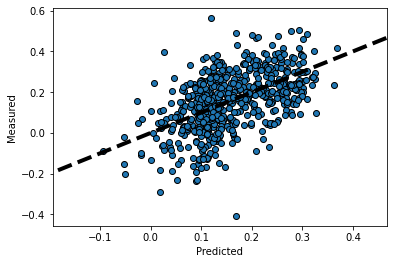

In [91]:
lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
cv = LeaveOneOut()
predicted = cross_val_predict(lr, X_z, y, cv=cv)

MAE = mean(abs(y - predicted)) # MAE
accuracy = metrics.r2_score(y, predicted) #Rsquared
print('MAE:',MAE)
print('R squard:',accuracy)




fig, ax = plt.subplots()
ax.scatter(predicted,y, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Predicted")
ax.set_ylabel("Measured")
plt.xlim([predicted.min()-0.1, predicted.max()+0.1])
plt.savefig("13_5_residual.png")

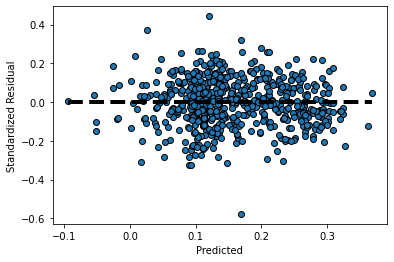

In [92]:
residual = y - predicted

fig, ax = plt.subplots()
ax.scatter(predicted,residual, edgecolors=(0, 0, 0))
ax.plot([predicted.min(), predicted.max()], [0,0], "k--", lw=4)
ax.set_xlabel("Predicted")
ax.set_ylabel("Standardized Residual")
plt.show()

#### region 13_6

In [93]:
df = df13_6

In [94]:
#nog ectra drop per regio based on previous collerations 
df = df.drop(['prcp_diff_1980_2000'],axis=1)

In [95]:
y = df['dmdtda']
X = df.drop(['dmdtda'], axis=1)

In [96]:
#making a zscore
numerical = X.drop(['glacial_lake','Aspect'], axis=1)
x_list_numerical = numerical.columns

X_z = (X[x_list_numerical] - X[x_list_numerical].mean())/X[x_list_numerical].std()
X_z = pd.concat([X_z, X['glacial_lake']], axis=1)
X_z = pd.concat([X_z, X['Aspect']], axis=1)

In [97]:
#Model statistics
#Must add constant for y-intercept
model = sm.OLS(y, sm.add_constant(X_z)).fit()

sig = np.where(model.pvalues <0.05)
model13_6 = model.params.iloc[sig]

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 dmdtda   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     23.45
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           2.43e-38
Time:                        14:43:12   Log-Likelihood:                 211.13
No. Observations:                 311   AIC:                            -394.3
Df Residuals:                     297   BIC:                            -341.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0358    

MAE: 0.099055065912888
R squard: 0.4567677634711981


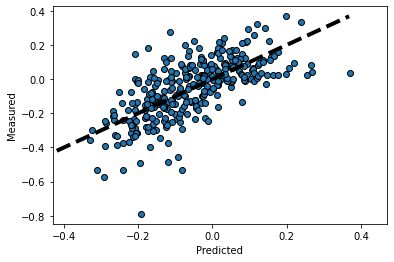

In [98]:
lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
cv = LeaveOneOut()
predicted = cross_val_predict(lr, X_z, y, cv=cv)

MAE = mean(abs(y - predicted)) # MAE
accuracy = metrics.r2_score(y, predicted) #Rsquared
print('MAE:',MAE)
print('R squard:',accuracy)




fig, ax = plt.subplots()
ax.scatter(predicted,y, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Predicted")
ax.set_ylabel("Measured")
plt.xlim([predicted.min()-0.1, predicted.max()+0.1])
plt.savefig("13_6_residual.png")

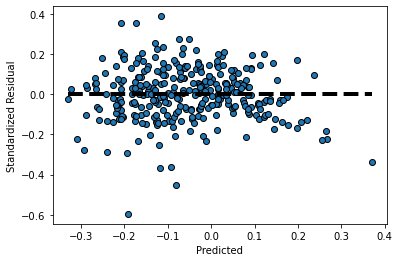

In [99]:
residual = y - predicted

fig, ax = plt.subplots()
ax.scatter(predicted,residual, edgecolors=(0, 0, 0))
ax.plot([predicted.min(), predicted.max()], [0,0], "k--", lw=4)
ax.set_xlabel("Predicted")
ax.set_ylabel("Standardized Residual")
plt.show()

#### region 13_7

In [100]:
df = df13_7

In [101]:
#nog ectra drop per regio based on previous collerations 
#df = niet nodig

In [102]:
y = df['dmdtda']
X = df.drop(['dmdtda'], axis=1)

In [103]:
# ruimte om variable te transformeren als ik wil 
#['Slope_log'] = np.log(X['Slope'])

In [104]:
#making a zscore
numerical = X.drop(['glacial_lake','Aspect'], axis=1)
x_list_numerical = numerical.columns

X_z = (X[x_list_numerical] - X[x_list_numerical].mean())/X[x_list_numerical].std()
X_z = pd.concat([X_z, X['glacial_lake']], axis=1)
X_z = pd.concat([X_z, X['Aspect']], axis=1)

In [105]:
#Model statistics
#Must add constant for y-intercept
model = sm.OLS(y, sm.add_constant(X_z)).fit()

sig = np.where(model.pvalues <0.05)
model13_7 = model.params.iloc[sig]

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 dmdtda   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     15.91
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           8.41e-24
Time:                        14:43:13   Log-Likelihood:                 153.14
No. Observations:                 176   AIC:                            -276.3
Df Residuals:                     161   BIC:                            -228.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2729    

MAE: 0.08807874204166989
R squard: 0.47950208765049473


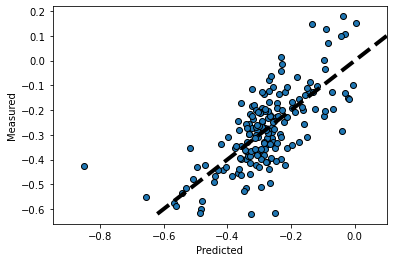

In [106]:
lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
cv = LeaveOneOut()
predicted = cross_val_predict(lr, X_z, y, cv=cv)

MAE = mean(abs(y - predicted)) # MAE
accuracy = metrics.r2_score(y, predicted) #Rsquared
print('MAE:',MAE)
print('R squard:',accuracy)




fig, ax = plt.subplots()
ax.scatter(predicted,y, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Predicted")
ax.set_ylabel("Measured")
plt.xlim([predicted.min()-0.1, predicted.max()+0.1])
plt.savefig("13_7_residual.png")

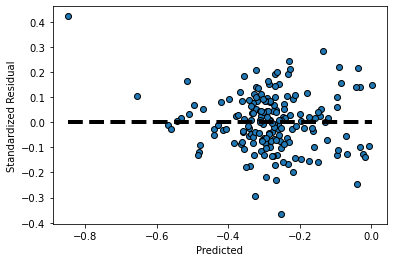

In [107]:
residual = y - predicted

fig, ax = plt.subplots()
ax.scatter(predicted,residual, edgecolors=(0, 0, 0))
ax.plot([predicted.min(), predicted.max()], [0,0], "k--", lw=4)
ax.set_xlabel("Predicted")
ax.set_ylabel("Standardized Residual")
plt.show()

#### region 13_8

In [108]:
df = df13_8

In [109]:
#nog ectra drop per regio based on previous collerations 
#df = niet nodig

In [110]:
y = df['dmdtda']
X = df.drop(['dmdtda'], axis=1)

In [111]:
# ruimte om variable te transformeren als ik wil 
#['Slope_log'] = np.log(X['Slope'])

In [112]:
#making a zscore
numerical = X.drop(['glacial_lake','Aspect'], axis=1)
x_list_numerical = numerical.columns

X_z = (X[x_list_numerical] - X[x_list_numerical].mean())/X[x_list_numerical].std()
X_z = pd.concat([X_z, X['glacial_lake']], axis=1)
X_z = pd.concat([X_z, X['Aspect']], axis=1)

In [113]:
#Model statistics
#Must add constant for y-intercept
model = sm.OLS(y, sm.add_constant(X_z)).fit()

sig = np.where(model.pvalues <0.05)
model13_8 = model.params.iloc[sig]

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 dmdtda   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     61.05
Date:                Tue, 28 Jun 2022   Prob (F-statistic):          2.47e-115
Time:                        14:43:14   Log-Likelihood:                 267.47
No. Observations:                 802   AIC:                            -504.9
Df Residuals:                     787   BIC:                            -434.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3133    

MAE: 0.14059035869512326
R squard: 0.49822743431278704


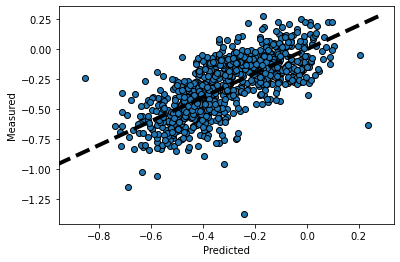

In [114]:
lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
cv = LeaveOneOut()
predicted = cross_val_predict(lr, X_z, y, cv=cv)

MAE = mean(abs(y - predicted)) # MAE
accuracy = metrics.r2_score(y, predicted) #Rsquared
print('MAE:',MAE)
print('R squard:',accuracy)




fig, ax = plt.subplots()
ax.scatter(predicted,y, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Predicted")
ax.set_ylabel("Measured")
plt.xlim([predicted.min()-0.1, predicted.max()+0.1])
plt.savefig("13_8_residual.png")

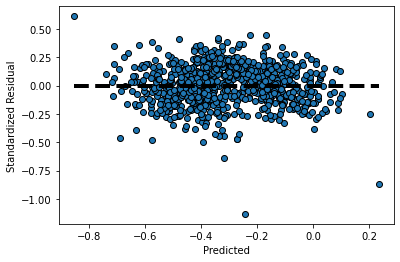

In [115]:
residual = y - predicted

fig, ax = plt.subplots()
ax.scatter(predicted,residual, edgecolors=(0, 0, 0))
ax.plot([predicted.min(), predicted.max()], [0,0], "k--", lw=4)
ax.set_xlabel("Predicted")
ax.set_ylabel("Standardized Residual")
plt.show()

#### region 13_9

In [116]:
df = df13_9

In [117]:
#nog ectra drop per regio based on previous collerations 
df = df.drop(['prcp_diff','prcp_mean','prcp_diff_1980_2000'],axis=1)

In [118]:
y = df['dmdtda']
X = df.drop(['dmdtda'], axis=1)

In [119]:
# ruimte om variable te transformeren als ik wil 
#['Slope_log'] = np.log(X['Slope'])

In [120]:
#making a zscore
numerical = X.drop(['glacial_lake','Aspect'], axis=1)
x_list_numerical = numerical.columns

X_z = (X[x_list_numerical] - X[x_list_numerical].mean())/X[x_list_numerical].std()
X_z = pd.concat([X_z, X['glacial_lake']], axis=1)
X_z = pd.concat([X_z, X['Aspect']], axis=1)

In [121]:
#Model statistics
#Must add constant for y-intercept
model = sm.OLS(y, sm.add_constant(X_z)).fit()

sig = np.where(model.pvalues <0.05)
model13_9 = model.params.iloc[sig]

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 dmdtda   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     9.933
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           4.94e-15
Time:                        14:43:17   Log-Likelihood:                -37.154
No. Observations:                 271   AIC:                             98.31
Df Residuals:                     259   BIC:                             141.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5880    

MAE: 0.20717299869682798
R squard: 0.22018989328750505


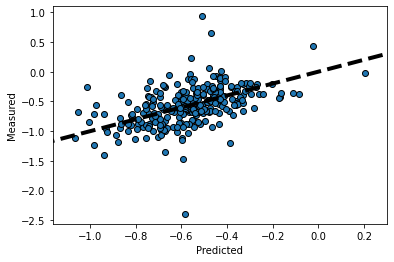

In [122]:
lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
cv = LeaveOneOut()
predicted = cross_val_predict(lr, X_z, y, cv=cv)

MAE = mean(abs(y - predicted)) # MAE
accuracy = metrics.r2_score(y, predicted) #Rsquared
print('MAE:',MAE)
print('R squard:',accuracy)




fig, ax = plt.subplots()
ax.scatter(predicted,y, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Predicted")
ax.set_ylabel("Measured")
plt.xlim([predicted.min()-0.1, predicted.max()+0.1])
plt.savefig("13_9_residual.png")

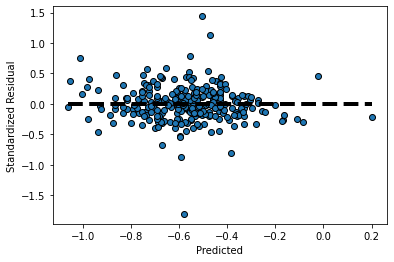

In [123]:
residual = y - predicted

fig, ax = plt.subplots()
ax.scatter(predicted,residual, edgecolors=(0, 0, 0))
ax.plot([predicted.min(), predicted.max()], [0,0], "k--", lw=4)
ax.set_xlabel("Predicted")
ax.set_ylabel("Standardized Residual")
plt.show()

#### region 14_1

In [124]:
df = df14_1

In [125]:
#nog ectra drop per regio based on previous collerations 
df = df.drop(['prcp_mean','Velocity_log'],axis=1)

In [126]:
y = df['dmdtda']
X = df.drop(['dmdtda'], axis=1)

In [127]:
# ruimte om variable te transformeren als ik wil 
#['Slope_log'] = np.log(X['Slope'])

In [128]:
#making a zscore
numerical = X.drop(['glacial_lake','Aspect'], axis=1)
x_list_numerical = numerical.columns

X_z = (X[x_list_numerical] - X[x_list_numerical].mean())/X[x_list_numerical].std()
X_z = pd.concat([X_z, X['glacial_lake']], axis=1)
X_z = pd.concat([X_z, X['Aspect']], axis=1)

In [129]:
#Model statistics
#Must add constant for y-intercept
model = sm.OLS(y, sm.add_constant(X_z)).fit()

sig = np.where(model.pvalues <0.05)
model14_1 = model.params.iloc[sig]

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 dmdtda   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     20.52
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           1.31e-30
Time:                        14:43:18   Log-Likelihood:                 131.76
No. Observations:                 253   AIC:                            -237.5
Df Residuals:                     240   BIC:                            -191.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1918    

MAE: 0.11158411420783529
R squard: 0.4266640866679179


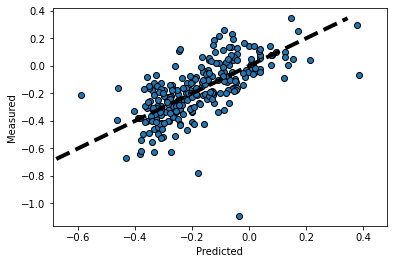

In [130]:
lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
cv = LeaveOneOut()
predicted = cross_val_predict(lr, X_z, y, cv=cv)

MAE = mean(abs(y - predicted)) # MAE
accuracy = metrics.r2_score(y, predicted) #Rsquared
print('MAE:',MAE)
print('R squard:',accuracy)




fig, ax = plt.subplots()
ax.scatter(predicted,y, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Predicted")
ax.set_ylabel("Measured")
plt.xlim([predicted.min()-0.1, predicted.max()+0.1])
plt.savefig("14_1_residual.png")

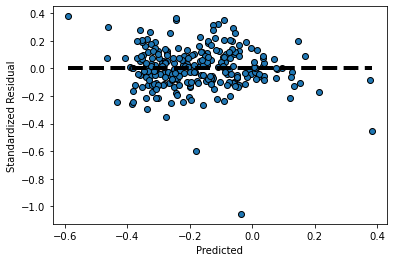

In [131]:
residual = y - predicted

fig, ax = plt.subplots()
ax.scatter(predicted,residual, edgecolors=(0, 0, 0))
ax.plot([predicted.min(), predicted.max()], [0,0], "k--", lw=4)
ax.set_xlabel("Predicted")
ax.set_ylabel("Standardized Residual")
plt.show()

#### region 14_2

In [132]:
df = df14_2

In [133]:
#nog ectra drop per regio based on previous collerations 
df = df.drop(['Velocity_log'],axis=1)

In [134]:
y = df['dmdtda']
X = df.drop(['dmdtda'], axis=1)

In [135]:
# ruimte om variable te transformeren als ik wil 
#['Slope_log'] = np.log(X['Slope'])

In [136]:
#making a zscore
numerical = X.drop(['glacial_lake','Aspect'], axis=1)
x_list_numerical = numerical.columns

X_z = (X[x_list_numerical] - X[x_list_numerical].mean())/X[x_list_numerical].std()
X_z = pd.concat([X_z, X['glacial_lake']], axis=1)
X_z = pd.concat([X_z, X['Aspect']], axis=1)

In [137]:
#Model statistics
#Must add constant for y-intercept
model = sm.OLS(y, sm.add_constant(X_z)).fit()

sig = np.where(model.pvalues <0.05)
model14_2 = model.params.iloc[sig]

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 dmdtda   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     31.57
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           1.30e-69
Time:                        14:43:19   Log-Likelihood:                 875.79
No. Observations:                1481   AIC:                            -1724.
Df Residuals:                    1467   BIC:                            -1649.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0363    

MAE: 0.10255071526582475
R squard: 0.2025176691267112


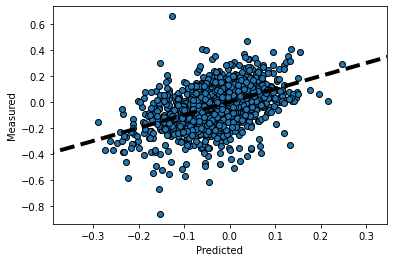

In [138]:
lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
cv = LeaveOneOut()
predicted = cross_val_predict(lr, X_z, y, cv=cv)

MAE = mean(abs(y - predicted)) # MAE
accuracy = metrics.r2_score(y, predicted) #Rsquared
print('MAE:',MAE)
print('R squard:',accuracy)



fig, ax = plt.subplots()
ax.scatter(predicted,y, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Predicted")
ax.set_ylabel("Measured")
plt.xlim([predicted.min()-0.1, predicted.max()+0.1])
plt.savefig("14_2_residual.png")

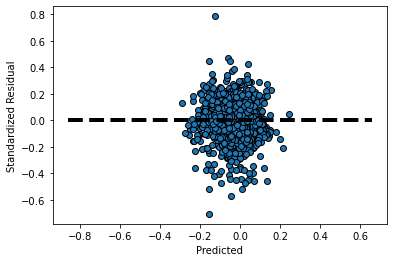

In [139]:
residual = y - predicted

fig, ax = plt.subplots()
ax.scatter(predicted,residual, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [0,0], "k--", lw=4)
ax.set_xlabel("Predicted")
ax.set_ylabel("Standardized Residual")
plt.show()

#### region 14_3

In [140]:
df = df14_3

In [141]:
#nog ectra drop per regio based on previous collerations 
#df =  niet nodgi

In [142]:
y = df['dmdtda']
X = df.drop(['dmdtda'], axis=1)

In [143]:
# ruimte om variable te transformeren als ik wil 
#['Slope_log'] = np.log(X['Slope'])

In [144]:
#making a zscore
numerical = X.drop(['glacial_lake','Aspect'], axis=1)
x_list_numerical = numerical.columns

X_z = (X[x_list_numerical] - X[x_list_numerical].mean())/X[x_list_numerical].std()
X_z = pd.concat([X_z, X['glacial_lake']], axis=1)
X_z = pd.concat([X_z, X['Aspect']], axis=1)

In [145]:
#Model statistics
#Must add constant for y-intercept
model = sm.OLS(y, sm.add_constant(X_z)).fit()

sig = np.where(model.pvalues <0.05)
model14_3 = model.params.iloc[sig]

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 dmdtda   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     36.11
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           1.17e-73
Time:                        14:43:25   Log-Likelihood:                 331.94
No. Observations:                 734   AIC:                            -633.9
Df Residuals:                     719   BIC:                            -564.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3415    

MAE: 0.12077777021707398
R squard: 0.38092207595176586


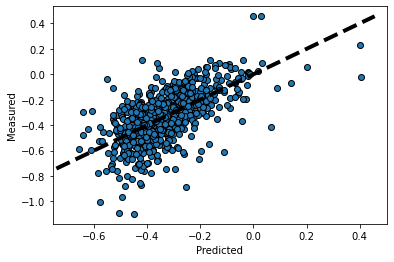

In [146]:
lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
cv = LeaveOneOut()
predicted = cross_val_predict(lr, X_z, y, cv=cv)

MAE = mean(abs(y - predicted)) # MAE
accuracy = metrics.r2_score(y, predicted) #Rsquared
print('MAE:',MAE)
print('R squard:',accuracy)




fig, ax = plt.subplots()
ax.scatter(predicted,y, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Predicted")
ax.set_ylabel("Measured")
plt.xlim([predicted.min()-0.1, predicted.max()+0.1])
plt.savefig("14_3_residual.png")

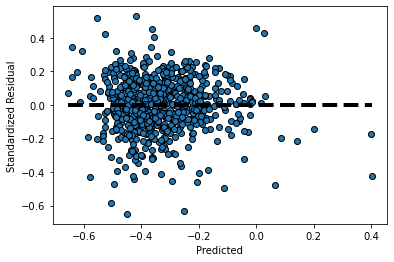

In [147]:
residual = y - predicted

fig, ax = plt.subplots()
ax.scatter(predicted,residual, edgecolors=(0, 0, 0))
ax.plot([predicted.min(), predicted.max()], [0,0], "k--", lw=4)
ax.set_xlabel("Predicted")
ax.set_ylabel("Standardized Residual")
plt.show()

#### region 15_1

In [148]:
df = df15_1

In [149]:
#nog ectra drop per regio based on previous collerations 
df = df.drop(['prcp_mean'],axis=1)

In [150]:
y = df['dmdtda']
X = df.drop(['dmdtda'], axis=1)

In [151]:
# ruimte om variable te transformeren als ik wil 
#['Slope_log'] = np.log(X['Slope'])

In [152]:
#making a zscore
numerical = X.drop(['glacial_lake','Aspect'], axis=1)
x_list_numerical = numerical.columns

X_z = (X[x_list_numerical] - X[x_list_numerical].mean())/X[x_list_numerical].std()
X_z = pd.concat([X_z, X['glacial_lake']], axis=1)
X_z = pd.concat([X_z, X['Aspect']], axis=1)

In [153]:
#Model statistics
#Must add constant for y-intercept
model = sm.OLS(y, sm.add_constant(X_z)).fit()

sig = np.where(model.pvalues <0.05)
model15_1 = model.params.iloc[sig]

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 dmdtda   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     23.11
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           1.85e-43
Time:                        14:43:27   Log-Likelihood:                 46.336
No. Observations:                 518   AIC:                            -64.67
Df Residuals:                     504   BIC:                            -5.173
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3714    

MAE: 0.16883432401441378
R squard: 0.3362694779348808


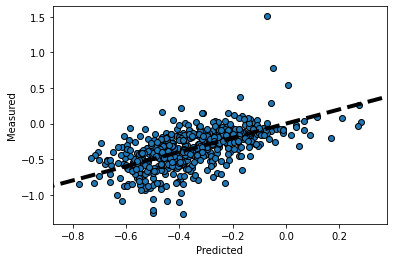

In [154]:
lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
cv = LeaveOneOut()
predicted = cross_val_predict(lr, X_z, y, cv=cv)

MAE = mean(abs(y - predicted)) # MAE
accuracy = metrics.r2_score(y, predicted) #Rsquared
print('MAE:',MAE)
print('R squard:',accuracy)




fig, ax = plt.subplots()
ax.scatter(predicted,y, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Predicted")
ax.set_ylabel("Measured")
plt.xlim([predicted.min()-0.1, predicted.max()+0.1])
plt.savefig("15_1_residual.png")

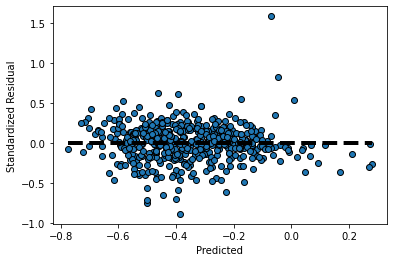

In [155]:
residual = y - predicted

fig, ax = plt.subplots()
ax.scatter(predicted,residual, edgecolors=(0, 0, 0))
ax.plot([predicted.min(), predicted.max()], [0,0], "k--", lw=4)
ax.set_xlabel("Predicted")
ax.set_ylabel("Standardized Residual")
plt.show()

#### region 15_2

In [156]:
df = df15_2

In [157]:
#nog ectra drop per regio based on previous collerations 
df = df.drop(['Zmed','prcp_mean','temp_diff_1980-2000'],axis=1)

In [158]:
y = df['dmdtda']
X = df.drop(['dmdtda'], axis=1)

In [159]:
# ruimte om variable te transformeren als ik wil 
#['Slope_log'] = np.log(X['Slope'])

In [160]:
#making a zscore
numerical = X.drop(['glacial_lake','Aspect'], axis=1)
x_list_numerical = numerical.columns

X_z = (X[x_list_numerical] - X[x_list_numerical].mean())/X[x_list_numerical].std()
X_z = pd.concat([X_z, X['glacial_lake']], axis=1)
X_z = pd.concat([X_z, X['Aspect']], axis=1)

In [161]:
#Model statistics
#Must add constant for y-intercept
model = sm.OLS(y, sm.add_constant(X_z)).fit()

sig = np.where(model.pvalues <0.05)
model15_2 = model.params.iloc[sig]

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 dmdtda   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     29.19
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           2.78e-46
Time:                        14:43:29   Log-Likelihood:                 97.862
No. Observations:                 467   AIC:                            -171.7
Df Residuals:                     455   BIC:                            -122.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.4236    

MAE: 0.15834992127544298
R squard: 0.3799744068757782


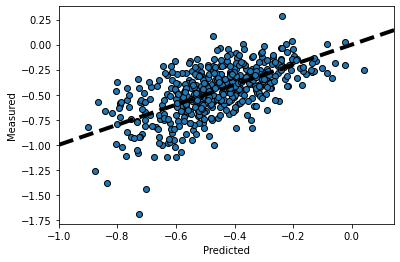

In [162]:
lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
cv = LeaveOneOut()
predicted = cross_val_predict(lr, X_z, y, cv=cv)

MAE = mean(abs(y - predicted)) # MAE
accuracy = metrics.r2_score(y, predicted) #Rsquared
print('MAE:',MAE)
print('R squard:',accuracy)



fig, ax = plt.subplots()
ax.scatter(predicted,y, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Predicted")
ax.set_ylabel("Measured")
plt.xlim([predicted.min()-0.1, predicted.max()+0.1])
plt.savefig("15_2_residual.png")

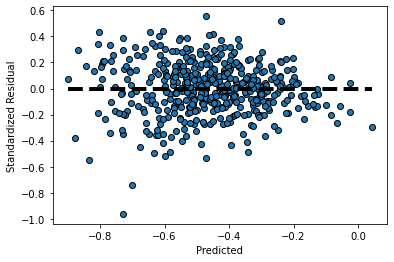

In [163]:
residual = y - predicted

fig, ax = plt.subplots()
ax.scatter(predicted,residual, edgecolors=(0, 0, 0))
ax.plot([predicted.min(), predicted.max()], [0,0], "k--", lw=4)
ax.set_xlabel("Predicted")
ax.set_ylabel("Standardized Residual")
plt.show()

#### region 15_3

In [164]:
df = df15_3

In [165]:
#nog ectra drop per regio based on previous collerations 
df = df.drop(['prcp_diff_1980_2000'],axis=1)

In [166]:
y = df['dmdtda']
X = df.drop(['dmdtda'], axis=1)

In [167]:
# ruimte om variable te transformeren als ik wil 
#['Slope_log'] = np.log(X['Slope'])

In [168]:
#making a zscore
numerical = X.drop(['glacial_lake','Aspect'], axis=1)
x_list_numerical = numerical.columns

X_z = (X[x_list_numerical] - X[x_list_numerical].mean())/X[x_list_numerical].std()
X_z = pd.concat([X_z, X['glacial_lake']], axis=1)
X_z = pd.concat([X_z, X['Aspect']], axis=1)

In [169]:
#Model statistics
#Must add constant for y-intercept
model = sm.OLS(y, sm.add_constant(X_z)).fit()

sig = np.where(model.pvalues <0.05)
model15_3 = model.params.iloc[sig]

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 dmdtda   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     10.69
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           7.84e-20
Time:                        14:43:31   Log-Likelihood:                -204.39
No. Observations:                 449   AIC:                             436.8
Df Residuals:                     435   BIC:                             494.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.6039    

MAE: 0.2761103384510984
R squard: 0.18134491741936065


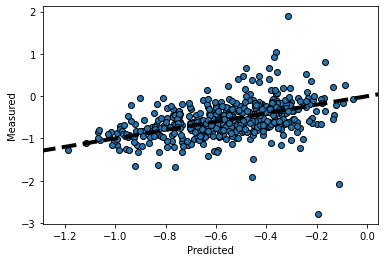

In [170]:
lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
cv = LeaveOneOut()
predicted = cross_val_predict(lr, X_z, y, cv=cv)

MAE = mean(abs(y - predicted)) # MAE
accuracy = metrics.r2_score(y, predicted) #Rsquared
print('MAE:',MAE)
print('R squard:',accuracy)



fig, ax = plt.subplots()
ax.scatter(predicted,y, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Predicted")
ax.set_ylabel("Measured")
plt.xlim([predicted.min()-0.1, predicted.max()+0.1])
plt.savefig("15_3_residual.png")

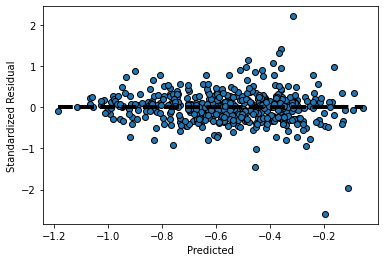

In [171]:
residual = y - predicted

fig, ax = plt.subplots()
ax.scatter(predicted,residual, edgecolors=(0, 0, 0))
ax.plot([predicted.min(), predicted.max()], [0,0], "k--", lw=4)
ax.set_xlabel("Predicted")
ax.set_ylabel("Standardized Residual")
plt.show()

#### combine model outputs; vizualize results

In [172]:
df_model_all = pd.DataFrame(modelAll,columns=['HMA'])
df_model13_1 = pd.DataFrame(model13_1,columns=['13_1'])
df_model13_2 = pd.DataFrame(model13_2,columns=['13_2'])
df_model13_3 = pd.DataFrame(model13_3,columns=['13_3'])
df_model13_4 = pd.DataFrame(model13_4,columns=['13_4'])
df_model13_5 = pd.DataFrame(model13_5,columns=['13_5'])
df_model13_6 = pd.DataFrame(model13_6,columns=['13_6'])
df_model13_7 = pd.DataFrame(model13_7,columns=['13_7'])
df_model13_8 = pd.DataFrame(model13_8,columns=['13_8'])
df_model13_9 = pd.DataFrame(model13_9,columns=['13_9'])

df_model14_1 = pd.DataFrame(model14_1,columns=['14_1'])
df_model14_2 = pd.DataFrame(model14_2,columns=['14_2'])
df_model14_3 = pd.DataFrame(model14_3,columns=['14_3'])

df_model15_1 = pd.DataFrame(model15_1,columns=['15_1'])
df_model15_2 = pd.DataFrame(model15_2,columns=['15_2'])
df_model15_3 = pd.DataFrame(model15_3,columns=['15_3'])

In [173]:
#combine resutls 
reg_coff_df = pd.concat([df_model_all,df_model13_1, df_model13_2,df_model13_3,df_model13_4,df_model13_5,df_model13_6,df_model13_7,df_model13_8,df_model13_9,df_model14_1,df_model14_2,df_model14_3,df_model15_1,df_model15_2,df_model15_3], axis=1, join="outer")

In [174]:
reg_coff_df = reg_coff_df.iloc[1: , :]

In [175]:
reg_coff_df = reg_coff_df.sort_values('HMA')

In [176]:
COLUMNS = reg_coff_df.transpose().columns

In [177]:
HMA = reg_coff_df['HMA'].fillna(0).tolist()

In [178]:
sub1 = reg_coff_df['13_1'].fillna(0).tolist()
sub2 = reg_coff_df['13_2'].fillna(0).tolist()
sub3 = reg_coff_df['13_3'].fillna(0).tolist()
sub4 = reg_coff_df['13_4'].fillna(0).tolist()
sub5 = reg_coff_df['13_5'].fillna(0).tolist()
sub6 = reg_coff_df['13_6'].fillna(0).tolist()

In [179]:
sub = (reg_coff_df['13_1'].fillna(0) + reg_coff_df['13_2'].fillna(0) + reg_coff_df['13_3'].fillna(0) + reg_coff_df['13_4'].fillna(0) + reg_coff_df['13_5'].fillna(0) + reg_coff_df['13_6'].fillna(0) + reg_coff_df['13_7'].fillna(0) + reg_coff_df['13_8'].fillna(0) + reg_coff_df['13_9'].fillna(0) + reg_coff_df['14_1'].fillna(0) + reg_coff_df['14_2'].fillna(0)+ reg_coff_df['14_3'].fillna(0) + reg_coff_df['15_1'].fillna(0) + reg_coff_df['15_2'].fillna(0) + reg_coff_df['15_3'].fillna(0))/15
SUBREGION = sub.tolist()

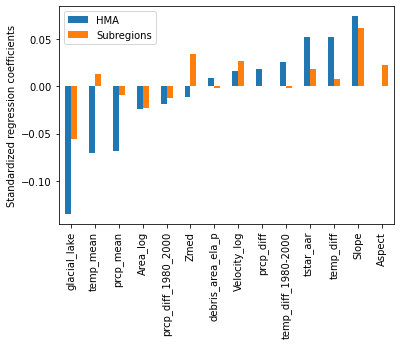

In [180]:
index = COLUMNS
df = pd.DataFrame({'HMA': HMA,'Subregions': SUBREGION}, index=index)
ax = df.plot.bar(rot=90)
ax.set_ylabel("Standardized regression coefficients")
plt.savefig("invloed_beta.png")

#### summary significant <0.05 regression results|

In [181]:
import seaborn as sns
cm = sns.color_palette("vlag", as_cmap=True) 
reg_coff_df.style.background_gradient(cmap=cm).set_precision(2)

,HMA,13_1,13_2,13_3,13_4,13_5,13_6,13_7,13_8,13_9,14_1,14_2,14_3,15_1,15_2,15_3
glacial_lake,-0.13,-0.17,nan,-0.05,nan,nan,nan,-0.07,nan,nan,nan,nan,-0.08,-0.14,-0.18,-0.16
temp_mean,-0.07,0.07,0.03,0.02,-0.05,0.05,nan,0.04,nan,0.08,-0.04,0.02,nan,nan,-0.03,nan
prcp_mean,-0.07,0.07,nan,nan,0.03,nan,-0.05,-0.06,-0.13,nan,nan,nan,nan,nan,nan,nan
Area_log,-0.02,-0.04,-0.04,nan,nan,-0.03,-0.02,nan,nan,-0.09,nan,-0.01,-0.07,-0.05,nan,nan
prcp_diff_1980_2000,-0.02,-0.08,0.02,-0.02,nan,nan,nan,nan,nan,nan,-0.03,nan,-0.03,nan,-0.05,nan
Zmed,-0.01,0.04,0.06,0.09,0.13,-0.03,0.12,nan,0.04,0.11,nan,-0.04,0.04,0.05,nan,-0.09
debris_area_ela_p,0.01,nan,0.02,nan,nan,-0.02,0.02,nan,-0.03,nan,nan,-0.02,nan,nan,nan,nan
Velocity_log,0.02,nan,0.04,nan,nan,0.02,nan,0.04,0.04,0.10,nan,nan,0.06,0.08,0.03,nan
prcp_diff,0.02,nan,nan,nan,-0.03,nan,0.03,0.04,nan,nan,-0.03,-0.03,-0.02,0.05,nan,nan
temp_diff_1980-2000,0.03,nan,0.03,-0.03,-0.08,0.01,nan,nan,0.06,nan,-0.04,0.02,-0.03,0.03,nan,nan
